**Logistic Regression**

Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

**Upload your ".csv" file to googlecolab/jupyter notebook**

read your dataset into the program

plot the correlation map if you have more than 2 columns in your dataset

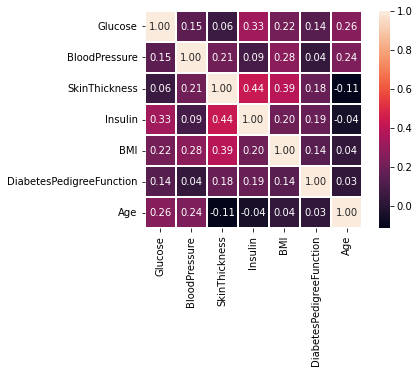

In [2]:
dataset = pd.read_csv('/content/diabetes2.csv') #read the dataset from the file location in google colab
sn.heatmap(dataset.corr(), annot = True, linewidths = 1, linecolor = 'w', square = True, fmt = '.2f') #plot the correlation map to check which features (x) best describe the label (y) 

**Use this function to visualize your dataset columns and rows**

In [3]:
dataset.head

<bound method NDFrame.head of      Glucose  BloodPressure  ...  Age  Outcome
0        148             72  ...   50      yes
1         85             66  ...   31       no
2        183             64  ...   32      yes
3         89             66  ...   21       no
4        137             40  ...   33      yes
..       ...            ...  ...  ...      ...
763      101             76  ...   63       no
764      122             70  ...   27       no
765      121             72  ...   30       no
766      126             60  ...   47      yes
767       93             70  ...   23       no

[768 rows x 8 columns]>

In [4]:
data = dataset[['Glucose', 'Outcome']]  #select one column (feature) that best describes your label and enter the x and y column names here
data.head

<bound method NDFrame.head of      Glucose Outcome
0        148     yes
1         85      no
2        183     yes
3         89      no
4        137     yes
..       ...     ...
763      101      no
764      122      no
765      121      no
766      126     yes
767       93      no

[768 rows x 2 columns]>

In [5]:
data.isnull().sum()  #check for any missing values in your dataset
#data.fillna(method ='ffill', inplace = True) or data.fillna(0) or data.dropna(inplace = True)
#if there are any missing values, fill them with either the previous value or with 0 or delete that row

Glucose    0
Outcome    0
dtype: int64

In [6]:
x = np.array(data['Glucose']).reshape(-1,1) #describe your feature array (there is 1 column but unknown no. of rows, hence reshape the array as (-1,1))
y = np.array(data['Outcome']).reshape(-1,1)   #describe your label array (unknown rows and 1 column)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)  #split your dataset into training data and testing data

**Train your dataset**

In [7]:
regr = LogisticRegression()
regr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Test your dataset**

Visualize your test data

In [8]:
y_pred = regr.predict(x_test)  #predict the new (test) data using your trained model
print(regr.score(x_test, y_test)) #check how well your model has performed on the test data (accuracy) - known as R2
print(np.round_(regr.coef_, decimals = 2))  #print your logistic regression coeffcient : B1
print(np.round_(regr.intercept_, decimals = 2))  #print your logistic regression intercept: B0

0.671875
[[0.04]]
[-5.55]


In [9]:
regr.classes_  #verify if your probability classes are correct (Should be 0 and 1)

array(['no', 'yes'], dtype=object)

In [10]:
regr.predict(x_test)  #visualize how your test data entries have been predicted as (192 entries)

array(['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


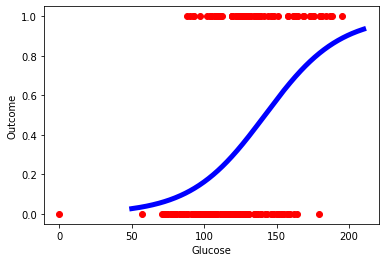

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_test = np.linspace(50, 210, 300)
y_test = label_encoder.fit_transform(y_test)
Y = expit(X_test * regr.coef_ + regr.intercept_).flatten()  #expit helps plot a sigmoid curve
plt.scatter(x_test, y_test, color ='red')
plt.plot(X_test, Y, color ='blue', linewidth= 5)
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()